# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.128617e+01     6.548038e+00
 * time: 0.0041370391845703125
     1     2.837811e+01     5.859647e+00
 * time: 0.012655019760131836
     2     2.639810e+01     1.099776e+01
 * time: 0.03292393684387207
     3     1.687394e+01     5.195383e+00
 * time: 0.057153940200805664
     4     1.246954e+01     1.223962e+00
 * time: 0.0794839859008789
     5     1.106007e+01     9.762636e-01
 * time: 0.09768104553222656
     6     1.062279e+01     2.621584e+00
 * time: 0.1124110221862793
     7     1.010600e+01     9.759812e-01
 * time: 0.12631702423095703
     8     9.859821e+00     7.928672e-01
 * time: 0.1403038501739502
     9     9.596973e+00     7.964421e-01
 * time: 0.15473389625549316
    10     9.474561e+00     5.831557e-01
 * time: 0.16944289207458496
    11     9.343345e+00     4.854689e-01
 * time: 0.18458890914916992
    12     9.288003e+00     6.160119e-01
 * time: 0.19603204727172852
    13     9.241717e+00     4.331620e-01
 * time

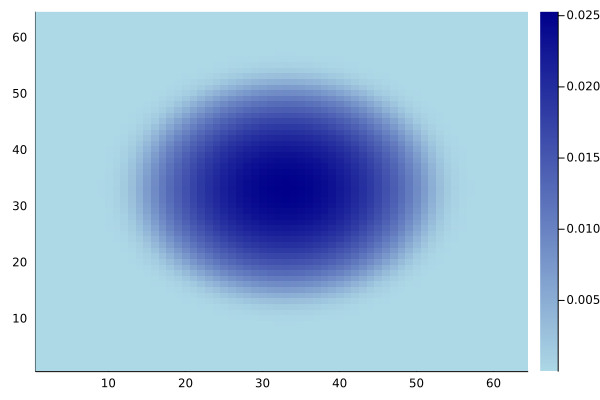

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)